In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv('Data/Census_Dataset.csv')
df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.60,75.80,18.50,0.40,...,0.50,1.30,1.80,26.50,23986,73.60,20.90,5.50,0.00,7.60
1,1003,Alabama,Baldwin,195121,95314,99807,4.50,83.10,9.50,0.60,...,1.00,1.40,3.90,26.40,85953,81.50,12.30,5.80,0.40,7.50
2,1005,Alabama,Barbour,26932,14497,12435,4.60,46.20,46.70,0.20,...,1.80,1.50,1.60,24.10,8597,71.80,20.80,7.30,0.10,17.60
3,1007,Alabama,Bibb,22604,12073,10531,2.20,74.50,21.40,0.40,...,0.60,1.50,0.70,28.80,8294,76.80,16.10,6.70,0.40,8.30
4,1009,Alabama,Blount,57710,28512,29198,8.60,87.90,1.50,0.30,...,0.90,0.40,2.30,34.90,22189,82.00,13.50,4.20,0.40,7.70


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3220 non-null   int64  
 1   State            3220 non-null   object 
 2   County           3220 non-null   object 
 3   TotalPop         3220 non-null   int64  
 4   Men              3220 non-null   int64  
 5   Women            3220 non-null   int64  
 6   Hispanic         3220 non-null   float64
 7   White            3220 non-null   float64
 8   Black            3220 non-null   float64
 9   Native           3220 non-null   float64
 10  Asian            3220 non-null   float64
 11  Pacific          3220 non-null   float64
 12  Citizen          3220 non-null   int64  
 13  Income           3219 non-null   float64
 14  IncomeErr        3219 non-null   float64
 15  IncomePerCap     3220 non-null   int64  
 16  IncomePerCapErr  3220 non-null   int64  
 17  Poverty       

In [4]:
df.columns[df.isnull().any(axis=0)]

Index(['Income', 'IncomeErr', 'ChildPoverty'], dtype='object')

In [5]:
df[df['Income'].isnull()]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2673,48301,Texas,Loving,117,74,43,35.00,41.00,0.00,12.80,...,8.10,0.00,16.10,25.40,62,71.00,27.40,1.60,0.00,15.10


In [6]:
df[df['IncomeErr'].isnull()]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2673,48301,Texas,Loving,117,74,43,35.00,41.00,0.00,12.80,...,8.10,0.00,16.10,25.40,62,71.00,27.40,1.60,0.00,15.10


In [7]:
df[df['ChildPoverty'].isnull()]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
548,15005,Hawaii,Kalawao,85,42,43,4.70,37.60,0.00,0.00,...,40.30,14.90,3.00,9.20,64,25.00,64.10,10.90,0.00,0.00


In [8]:
df[df.isnull().any(axis=1)].index

Int64Index([548, 2673], dtype='int64')

In [9]:
#df.dropna(axis=0,inplace=True)
df = df[~df.isnull().any(axis=1)]

In [10]:
df.isnull().any().sum()

0

In [11]:
df.set_index(df['State'] + "-" + df['County'],inplace=True)

In [12]:
df.drop(columns=['State','County','CensusId'],inplace=True)

In [13]:
df.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Alabama-Autauga,55221,26745,28476,2.60,75.80,18.50,0.40,1.00,0.00,40725,...,0.50,1.30,1.80,26.50,23986,73.60,20.90,5.50,0.00,7.60
Alabama-Baldwin,195121,95314,99807,4.50,83.10,9.50,0.60,0.70,0.00,147695,...,1.00,1.40,3.90,26.40,85953,81.50,12.30,5.80,0.40,7.50
Alabama-Barbour,26932,14497,12435,4.60,46.20,46.70,0.20,0.40,0.00,20714,...,1.80,1.50,1.60,24.10,8597,71.80,20.80,7.30,0.10,17.60
Alabama-Bibb,22604,12073,10531,2.20,74.50,21.40,0.40,0.10,0.00,17495,...,0.60,1.50,0.70,28.80,8294,76.80,16.10,6.70,0.40,8.30
Alabama-Blount,57710,28512,29198,8.60,87.90,1.50,0.30,0.10,0.00,42345,...,0.90,0.40,2.30,34.90,22189,82.00,13.50,4.20,0.40,7.70


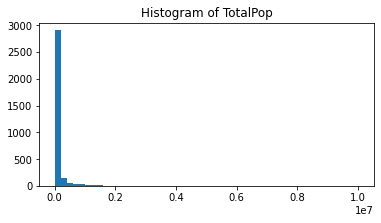

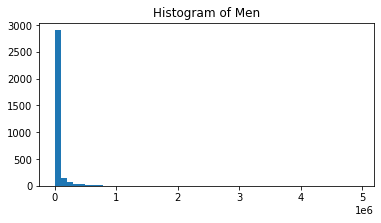

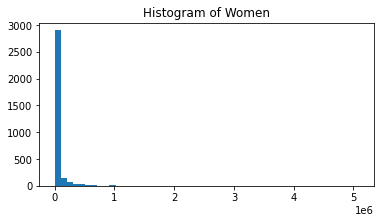

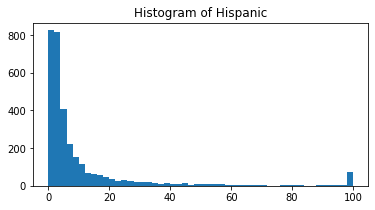

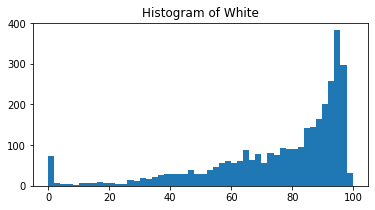

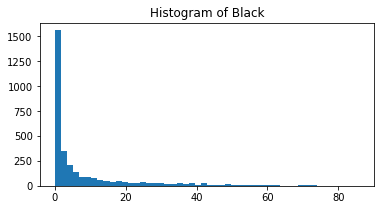

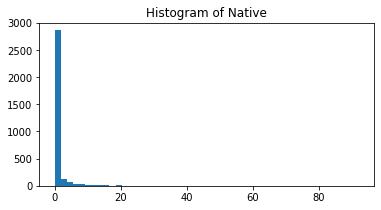

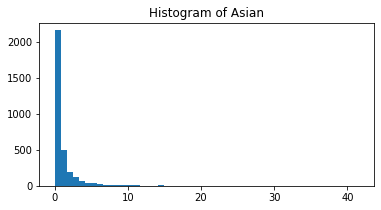

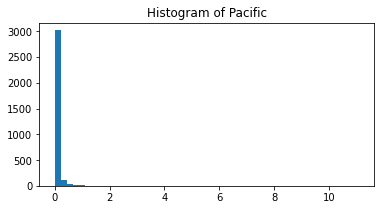

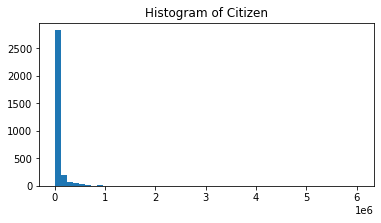

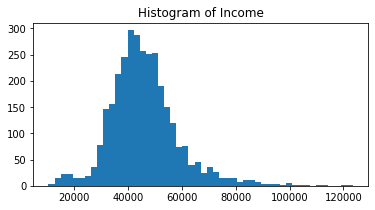

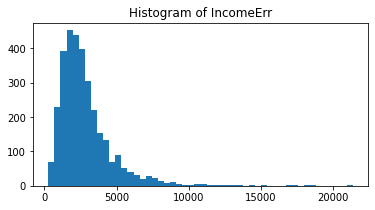

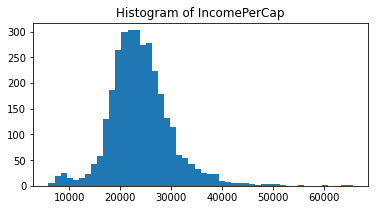

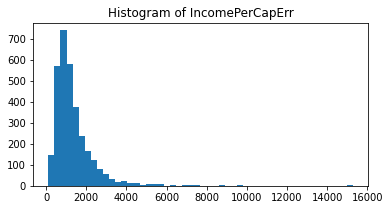

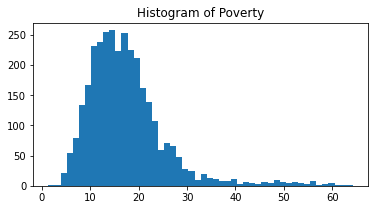

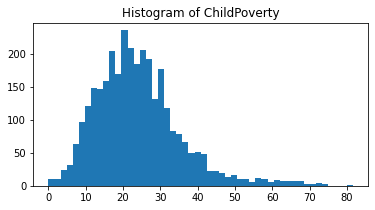

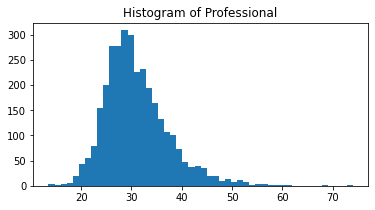

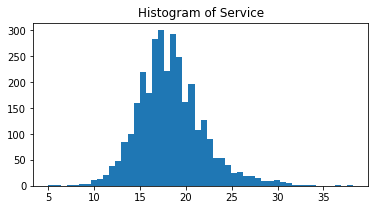

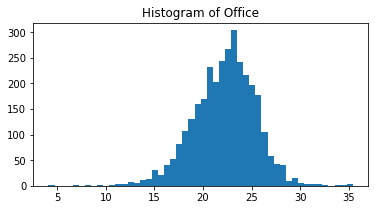

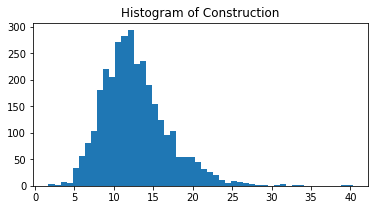

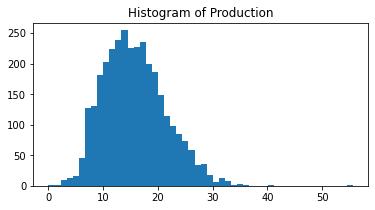

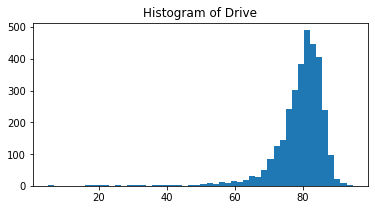

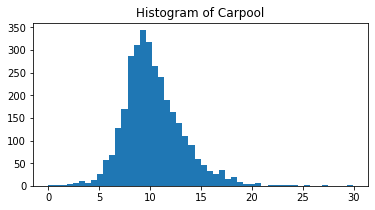

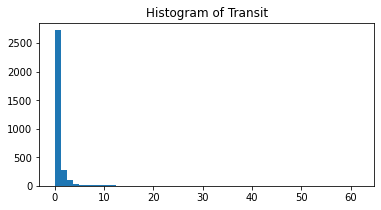

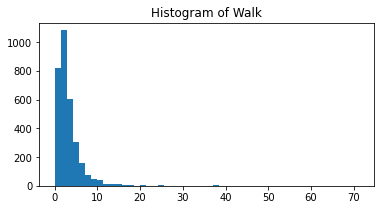

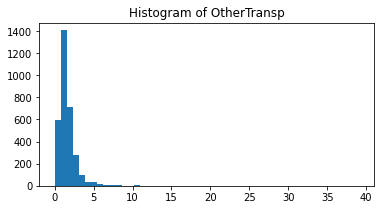

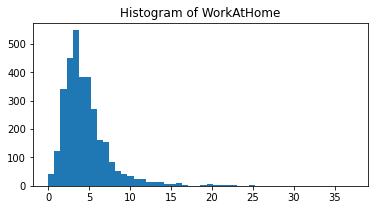

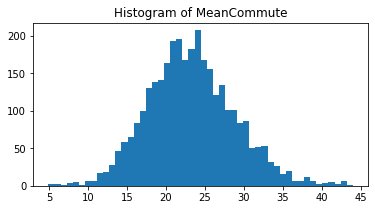

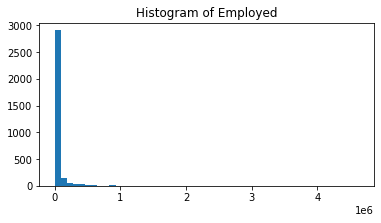

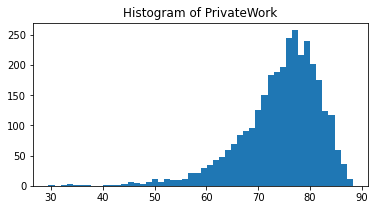

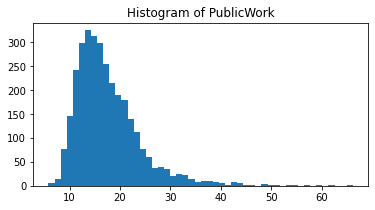

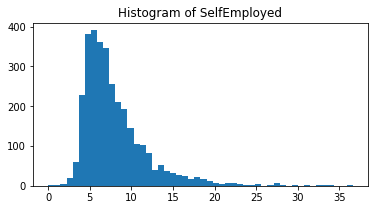

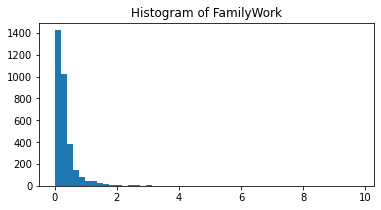

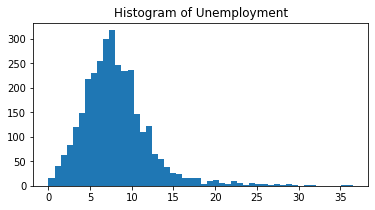

In [14]:
for column_name in df.columns.values:
    ax = plt.subplots(figsize=(6,3))
    ax = plt.hist(df[column_name], bins=50)
    title="Histogram of " + column_name
    plt.title(title, fontsize=12)
    plt.show()

In [15]:
scaler = MinMaxScaler()
counties_scaled = scaler.fit_transform(df.values)

df_new = pd.DataFrame(counties_scaled,columns=df.columns,index=df.index)
df_new.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Alabama-Autauga,0.01,0.01,0.01,0.03,0.76,0.22,0.00,0.02,0.00,0.01,...,0.01,0.03,0.05,0.55,0.01,0.75,0.25,0.15,0.00,0.21
Alabama-Baldwin,0.02,0.02,0.02,0.05,0.83,0.11,0.01,0.02,0.00,0.02,...,0.01,0.04,0.10,0.55,0.02,0.88,0.11,0.16,0.04,0.21
Alabama-Barbour,0.00,0.00,0.00,0.05,0.46,0.54,0.00,0.01,0.00,0.00,...,0.03,0.04,0.04,0.49,0.00,0.72,0.25,0.20,0.01,0.48
Alabama-Bibb,0.00,0.00,0.00,0.02,0.75,0.25,0.00,0.00,0.00,0.00,...,0.01,0.04,0.02,0.61,0.00,0.80,0.17,0.18,0.04,0.23
Alabama-Blount,0.01,0.01,0.01,0.09,0.88,0.02,0.00,0.00,0.00,0.01,...,0.01,0.01,0.06,0.77,0.00,0.89,0.13,0.11,0.04,0.21


In [16]:
df_new.describe()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3218.00,3218.00,3218.00,3218.00,3218.00,3218.00,3218.00,3218.00,3218.00,3218.00,...,3218.00,3218.00,3218.00,3218.00,3218.00,3218.00,3218.00,3218.00,3218.00,3218.00
mean,0.01,0.01,0.01,0.11,0.76,0.10,0.02,0.03,0.01,0.01,...,0.05,0.04,0.12,0.47,0.01,0.76,0.19,0.22,0.03,0.22
std,0.03,0.03,0.03,0.19,0.23,0.17,0.08,0.06,0.04,0.03,...,0.05,0.04,0.09,0.14,0.03,0.13,0.11,0.11,0.05,0.11
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.02,0.64,0.01,0.00,0.00,0.00,0.00,...,0.02,0.02,0.07,0.37,0.00,0.70,0.12,0.15,0.01,0.15
50%,0.00,0.00,0.00,0.04,0.84,0.02,0.00,0.01,0.00,0.00,...,0.03,0.03,0.10,0.46,0.00,0.79,0.17,0.19,0.02,0.21
75%,0.01,0.01,0.01,0.10,0.93,0.11,0.01,0.03,0.00,0.01,...,0.06,0.05,0.15,0.56,0.01,0.85,0.24,0.26,0.03,0.27
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Dimensionality Reduction

explained_variance_ , components_ = np.linalg.eig(np.cov(df.values.T))

components_.T

In [17]:
model2 = PCA(random_state=42)
df_transformed = pd.DataFrame(model2.fit_transform(df_new))
df_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.06,-0.16,0.09,0.12,-0.01,-0.04,-0.03,-0.11,0.10,-0.00,...,-0.01,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00
1,-0.15,-0.19,0.15,-0.02,-0.07,-0.05,-0.05,-0.05,-0.03,0.09,...,0.01,-0.01,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
2,0.51,-0.30,-0.15,0.30,0.09,0.07,-0.11,0.06,0.09,0.06,...,-0.02,0.01,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
3,0.07,-0.19,-0.22,0.01,0.28,-0.02,0.09,-0.02,0.02,-0.06,...,-0.02,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
4,-0.09,-0.25,-0.02,-0.19,0.10,-0.21,0.01,0.02,0.10,0.03,...,-0.01,0.01,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00


In [18]:
#pd.DataFrame(model2.singular_values_)

In [19]:
features_components = pd.DataFrame(model2.components_.T,
columns=[f"PC {i:02d}" for i in list(range(1, model2.n_components_ +1))],
index= df_new.columns.values).rename_axis(index='Features',columns='Components')
features_components

Components,PC 01,PC 02,PC 03,PC 04,PC 05,PC 06,PC 07,PC 08,PC 09,PC 10,...,PC 25,PC 26,PC 27,PC 28,PC 29,PC 30,PC 31,PC 32,PC 33,PC 34
Features,,,,,,,,,,,,,,,,,,,,,
TotalPop,0.01,-0.02,0.08,0.01,-0.02,-0.01,0.01,0.09,-0.06,-0.02,...,0.03,0.03,-0.00,0.18,0.32,-0.00,0.00,-0.03,0.00,-0.82
Men,0.00,-0.02,0.08,0.01,-0.02,-0.01,0.01,0.09,-0.06,-0.02,...,0.03,0.03,-0.00,0.24,0.33,0.04,-0.01,0.68,-0.07,0.40
Women,0.01,-0.02,0.08,0.01,-0.02,-0.01,0.01,0.09,-0.06,-0.02,...,0.04,0.03,-0.00,0.12,0.32,-0.05,0.01,-0.71,0.08,0.41
Hispanic,0.39,0.28,0.32,-0.53,0.10,0.05,-0.11,-0.11,-0.06,-0.08,...,0.01,-0.00,-0.50,-0.01,0.00,0.00,-0.00,0.00,-0.00,-0.00
White,-0.60,-0.09,-0.37,-0.16,-0.21,-0.20,-0.06,-0.05,-0.10,-0.03,...,-0.01,0.04,-0.50,-0.01,0.00,0.00,-0.00,0.00,-0.00,-0.00
Black,0.21,-0.35,0.00,0.62,0.31,0.17,-0.20,-0.10,-0.17,0.02,...,0.02,0.03,-0.43,-0.01,0.00,0.00,-0.00,0.00,-0.00,-0.00
Native,0.04,0.11,-0.04,0.12,-0.14,-0.00,0.26,0.16,0.34,0.13,...,0.01,-0.03,-0.49,-0.01,0.00,0.00,-0.00,0.00,-0.00,-0.00
Asian,-0.00,0.00,0.17,0.06,-0.03,0.01,0.12,0.18,-0.03,-0.10,...,-0.38,-0.30,-0.24,-0.01,0.01,0.00,0.00,-0.00,-0.00,-0.00
Pacific,0.00,0.01,0.02,0.01,-0.00,0.01,0.07,0.02,-0.01,0.00,...,0.63,0.45,-0.13,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00


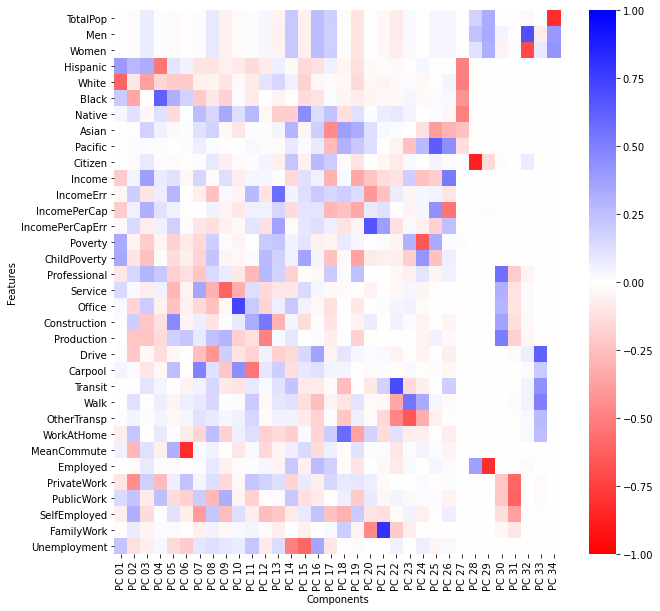

In [20]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(features_components, cmap='bwr_r',vmax=1,vmin=-1)
plt.show()

## What is the smallest number of principal components that captures at least 80% of the total variance in the dataset?

$$ Var_n = \frac{s_n^2}{\sum s^2} $$

In [21]:
total_explained_variance = (model2.singular_values_**2)/(model2.singular_values_**2).sum()
total_explained_variance[0]

0.32098700566161054

In [22]:
model2.explained_variance_ratio_[0]

0.3209870056616105

In [23]:
pd.DataFrame(np.array([model2.explained_variance_,model2.explained_variance_ratio_ * 100]).T,columns=["explained_variance","ratio %"]).rename_axis('component')

,explained_variance,ratio %
component,,
0,0.12,32.10
1,0.05,14.21
2,0.04,11.48
3,0.03,8.67
4,0.02,5.34
5,0.02,4.95
6,0.01,3.42
7,0.01,2.99
8,0.01,2.60


In [24]:
def described_variance(p):
    sumx = 0
    i = 0
    while sumx < p/100:
        sumx += total_explained_variance[i]
        i += 1
    return f'{p}% explained variance is described by the top {i} principal components'

In [25]:
described_variance(80)

'80% explained variance is described by the top 7 principal components'

In [26]:
described_variance(90)

'90% explained variance is described by the top 12 principal components'

In [27]:
df_transformed.shape

(3218, 34)

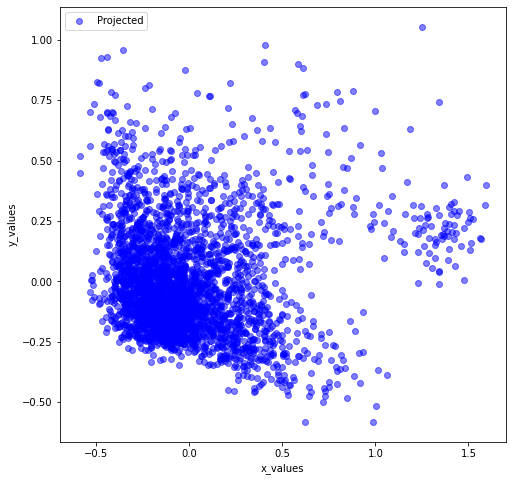

In [28]:
fig = plt.figure(figsize=(8,8))
plt.scatter(df_transformed[0],df_transformed[1], label = "Projected", color='blue', alpha=0.5)
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

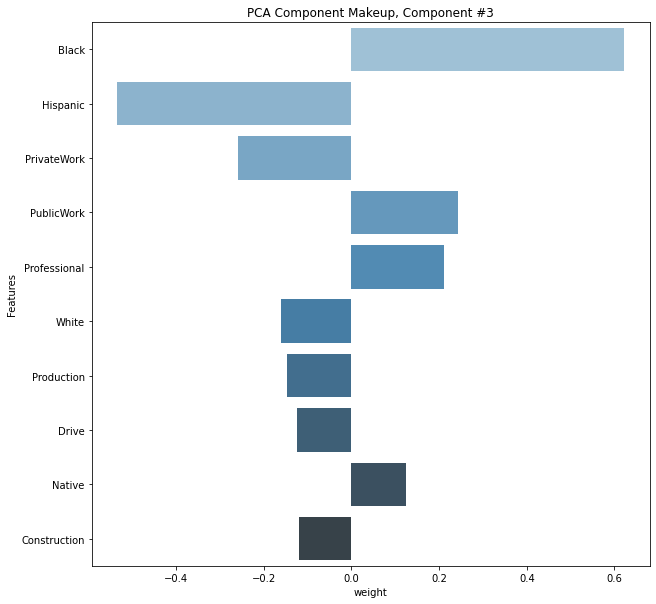

In [29]:
plt.figure(figsize=(10,10))
comps = features_components.iloc[:,[3]].copy()
order = np.argsort(np.abs(features_components.iloc[:,3].values))[::-1][:10]
comps = comps.iloc[order]
sns.barplot(x=comps.values.reshape(-1),y=comps.index.values,palette="Blues_d")
plt.title("PCA Component Makeup, Component #" + str(3))
plt.ylabel('Features')
plt.xlabel('weight')
plt.show()

In [30]:
top_7 = df_transformed.iloc[:,:7].copy()
top_7.columns = list(range(1,8))
top_7.columns.name = 'Axies'
top_7['State-County'] = df.index
top_7.set_index(['State-County'],inplace=True)
top_7

Axies,1,2,3,4,5,6,7
State-County,,,,,,,
Alabama-Autauga,-0.06,-0.16,0.09,0.12,-0.01,-0.04,-0.03
Alabama-Baldwin,-0.15,-0.19,0.15,-0.02,-0.07,-0.05,-0.05
Alabama-Barbour,0.51,-0.30,-0.15,0.30,0.09,0.07,-0.11
Alabama-Bibb,0.07,-0.19,-0.22,0.01,0.28,-0.02,0.09
Alabama-Blount,-0.09,-0.25,-0.02,-0.19,0.10,-0.21,0.01
...,...,...,...,...,...,...,...
Puerto Rico-Vega Baja,1.23,-0.01,0.26,-0.53,-0.10,-0.09,-0.19
Puerto Rico-Vieques,1.34,0.74,-0.14,-0.22,-0.13,0.08,0.24
Puerto Rico-Villalba,1.45,0.29,-0.03,-0.44,-0.06,-0.15,-0.15


In [31]:
KM_model = KMeans(n_clusters=8,random_state=42)
y_pred = KM_model.fit_predict(df_transformed.iloc[:,:7])

In [32]:
top_7['segment'] = y_pred
top_7.set_index(['segment'],append=True,inplace=True)
top_7

,Axies,1,2,3,4,5,6,7
State-County,segment,,,,,,,
Alabama-Autauga,1,-0.06,-0.16,0.09,0.12,-0.01,-0.04,-0.03
Alabama-Baldwin,1,-0.15,-0.19,0.15,-0.02,-0.07,-0.05,-0.05
Alabama-Barbour,4,0.51,-0.30,-0.15,0.30,0.09,0.07,-0.11
Alabama-Bibb,0,0.07,-0.19,-0.22,0.01,0.28,-0.02,0.09
Alabama-Blount,0,-0.09,-0.25,-0.02,-0.19,0.10,-0.21,0.01
...,...,...,...,...,...,...,...,...
Puerto Rico-Vega Baja,2,1.23,-0.01,0.26,-0.53,-0.10,-0.09,-0.19
Puerto Rico-Vieques,2,1.34,0.74,-0.14,-0.22,-0.13,0.08,0.24
Puerto Rico-Villalba,2,1.45,0.29,-0.03,-0.44,-0.06,-0.15,-0.15


In [34]:
top_7.index.to_frame(index=False).groupby(['segment'])['State-County'].apply(np.array)

segment
0    [Alabama-Bibb, Alabama-Blount, Alabama-Calhoun...
1    [Alabama-Autauga, Alabama-Baldwin, Alabama-Lim...
2    [Arizona-Santa Cruz, California-Imperial, New ...
3    [Alabama-Elmore, Alabama-Lee, Alabama-Madison,...
4    [Alabama-Barbour, Alabama-Bullock, Alabama-But...
5    [Alaska-Bristol Bay Borough, Alaska-Denali Bor...
6    [Alaska-Bethel Census Area, Alaska-Dillingham ...
7    [Alaska-Aleutians East Borough, Alaska-Aleutia...
Name: State-County, dtype: object

## Clusters Centers

In [35]:
pd.DataFrame(
KM_model.cluster_centers_,
index=list(range(1,KM_model.n_clusters + 1)),
columns=list(range(1,KM_model.n_features_in_ + 1))
).rename_axis(index='Centers',columns='Axies')

Axies,1,2,3,4,5,6,7
Centers,,,,,,,
1,-0.03,-0.09,-0.16,-0.06,-0.02,-0.08,0.03
2,-0.21,-0.06,0.00,-0.07,-0.05,0.05,0.01
3,1.27,0.24,0.18,-0.41,-0.11,-0.11,-0.14
4,-0.13,-0.05,0.37,0.09,-0.02,-0.08,0.00
5,0.37,-0.24,-0.08,0.27,0.09,0.06,-0.04
6,-0.24,0.36,-0.09,0.08,0.04,0.01,-0.07
7,0.54,0.57,-0.17,0.40,-0.28,-0.05,0.28
8,0.30,0.20,0.10,-0.16,0.13,0.11,0.07
